Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Softmax Regression - Exercises 1

## 1) Đọc hiểu file ‘SoftmaxRegression-Delta-1D-2Class-stochastic.ipynb’ về cách train bài toán softmax regression theo stochastic gradient descent.

Đầu tiên data iris_1D_2c.csv data được load lên và chia input: X có shape là 6x1 output: y shape là (6,) 1 vector có 6 element, và vẽ sự phân bố của data. Từ hình vẽ ta thấy được data chỉ có 2 class với label là 0 và 1.

X:  [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:  [0 0 0 1 1 1]


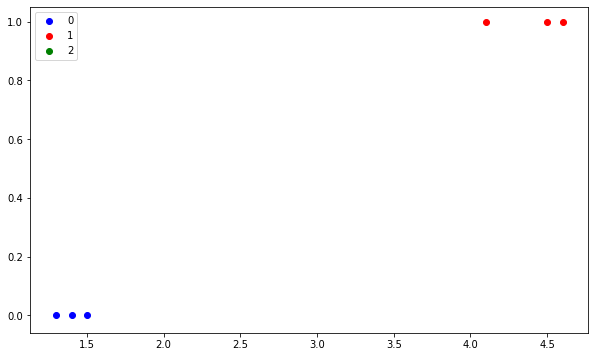

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

y = y.astype('uint8')

print('X: ', X)
print('y: ', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()

Bởi vì $z=wx + b$ nên khi nhân theo ma trận cần mở rộng thêm 1 cột bằng 1 ở X để  tạo ra $+b$

In [2]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print(X)

[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


Phần code này giúp hiểu rõ từng element và cách sắp xếp chúng để thực hiện phép nhân ma trận cho ra kết quả mong muốn theo cách train theo Stochastic. Data được load theo như miêu tả ở phần trên, Sau đó theta được khởi tạo theo mỗi cột là các parameter cho 1 output class. Khởi tạo các biến như learning rate, epochs, ... Ở đây có điểm đáng chú ý là:

- Ở đoạn code "compute the loss": probs[yi, range(num_sample_stochastic)] ở đây prob có kích thước là 2x1 , mỗi hàng là xác suất khả năng tin tưởng của các class đó, range(num_sample_stochastic) sẽ trả về range theo num_sample_stochastic hiện tại là 1 tương đới với 0, tức là probs[yi, [0]] element sẽ được lấy theo list index và hiện tại sẽ trả về theo dạng vector chứ không phải scalar.

- Ở đoạn code "compute the gradient on scores": dscores[range(num_sample_stochastic),yi] -= 1 tương đương với $\hat{y} - \delta{(i,y)}$
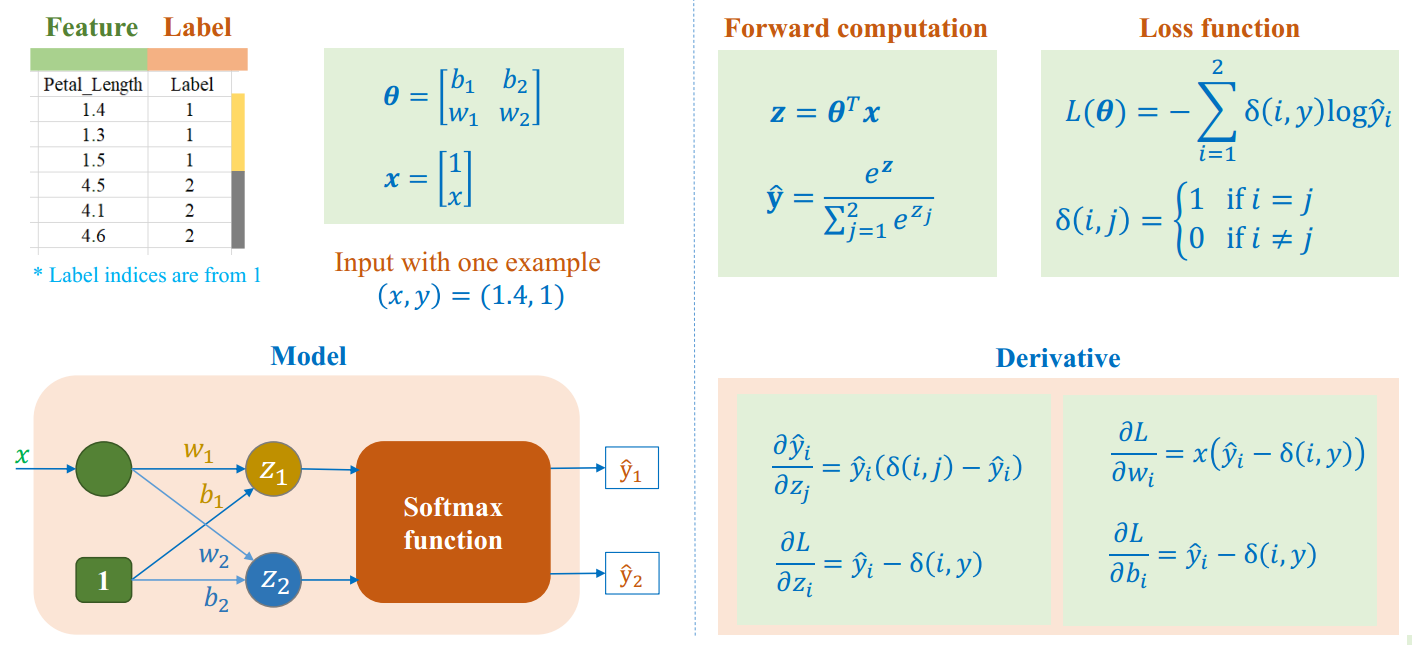

In [3]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

N = 3 # number of points per class
D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.array([[0.1, 0.05], [0.2, -0.1]])

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

print('theta: ',theta)

losses = []
num_iter = 1

num_sample_stochastic = 1
for epoch in range(num_iter):
    for i in range(num_examples): 
        xi = X[i:i+1]
        xi = xi.T
        yi = y[i:i+1]
        print('xi: ', xi)
        print('yi: ', yi)
        
        print('theta.T: ', theta.T)
        
        # evaluate class scores
        scores = np.dot(theta.T, xi) 
        print('Z: ', scores)
        
        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        print('exp_scores: ', exp_scores)
        print('probs: ', probs)
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)])
        print('corect_logprobs: ', corect_logprobs)
        loss = np.sum(corect_logprobs)/1
        print('loss: ', loss)
                
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_sample_stochastic),yi] -= 1
        print('dscores 1: ', dscores)
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)
        print('dtheta: ', dtheta)

        # perform a parameter update
        theta += -learning_rate *dtheta        
        print('theta: ', theta)
                
        break

theta:  [[ 0.1   0.05]
 [ 0.2  -0.1 ]]
xi:  [[1. ]
 [1.4]]
yi:  [0]
theta.T:  [[ 0.1   0.2 ]
 [ 0.05 -0.1 ]]
Z:  [[ 0.38]
 [-0.09]]
exp_scores:  [[1.46228459]
 [0.91393119]]
probs:  [[0.61538376]
 [0.38461624]]
corect_logprobs:  [0.48550921]
loss:  0.48550921164700406
dscores 1:  [[-0.38461624]
 [ 0.38461624]]
dtheta:  [[-0.38461624  0.38461624]
 [-0.53846274  0.53846274]]
theta:  [[ 0.13846162  0.01153838]
 [ 0.25384627 -0.15384627]]


Đây là phần đoạn code thực hiện để train theo stochastic gradient descent

In [4]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

N = 3 # number of points per class
D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.array([[0.1, 0.05], [0.2, -0.1]])

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

losses = []
num_iter = 100

num_sample_stochastic = 1
for epoch in range(num_iter):
    for i in range(num_examples): 
        xi = X[i:i+1]
        xi = xi.T
        yi = y[i:i+1]
        
        # evaluate class scores
        scores = np.dot(theta.T, xi)
        
        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)])
        loss = np.sum(corect_logprobs)
        losses.append(loss)
                
        # compute the gradient on scores
        dscores = probs
        dscores[yi,0] -= 1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)

        # perform a parameter update
        theta += -learning_rate *dtheta

Đoạn code này giúp đánh giá xem model đã học tốt hay chưa dự trên độ chính xác của các class được predict theo các sample, đầu tiên là inference input X, lấy index của các giá trị max (axis=0 tìm max của các hàng trong cùng 1 colum), dùng kết quả so sanh với y, hàm np.mean giúp tính tổng các giá trị True và chia cho độ dài tổng các sample

In [5]:
# evaluate training set accuracy
scores = np.dot(theta.T, X.T)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 1.00


## 2) Đọc hiểu file ‘SoftmaxRegression-Delta-1D-2Class-batch.ipynb’ về cách train bài toán softmax regression theo batch gradient descent.

Đoạn code này tương tự như phần 1 nhưng được train theo batch. theta được random với shape D+1xK trong đó D là số lượng feature + 1 (là bias) và K là số lượng classes. 

- Trong phần "compute the loss" : corect_logprobs = -np.log(probs[y, range(num_examples)]) có ý nghĩa là chỉ lấy những $\hat{y}$ với số lượng num_examples theo label y.

- Tương tự "compute the gradient on scores": dscores[y, range(num_examples)] -= 1 chỉ lấy $\hat{y}$ với số lượng num_examples trừ đi 1

In [6]:
iris = np.genfromtxt('iris_1D_2c.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X = X.T

D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.random.randn(D+1,K)

# gradient descent loop
num_examples = X.shape[1]
learning_rate = 0.1

losses = []
num_iter = 100
for epoch in range(num_iter):    
    # evaluate class scores
    scores = np.dot(theta.T, X)

    #compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)

    # compute the loss
    corect_logprobs = -np.log(probs[y, range(num_examples)])
    loss = np.sum(corect_logprobs)
    losses.append(loss)

    # compute the gradient on scores
    dscores = probs
    dscores[y, range(num_examples)] -= 1

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X, dscores.T)

    # perform a parameter update
    theta += -learning_rate *dtheta

## 3) Dựa vào file ‘SoftmaxRegression-Delta-1D-2Class-stochastic.ipynb’, cài đặt lại cho file data ‘iris_full.csv’.

In [1]:
import numpy as np
iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)

print(iris_full.shape)

for col_idx in range(iris_full.shape[1] - 1):
    print('feature {} min={}, max={}'.format(col_idx, min(iris_full[:,col_idx]), max(iris_full[:,col_idx]) ))

print("clasess = {}".format(np.unique(iris_full[:, -1])))

(150, 5)
feature 0 min=4.3, max=7.9
feature 1 min=2.0, max=4.4
feature 2 min=1.0, max=6.9
feature 3 min=0.1, max=2.5
clasess = [0. 1. 2.]


Quan sát data có 150 samples, 4 features, và 3 classes

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# load data
iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_full[:, :4]
y = iris_full[:, 4].astype(np.uint8)

def normalize_data(X):
    new_X = list(map(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)),
                [X[i,:] for i in range(X.shape[0])]))
    new_X = np.asarray(new_X)
    print(new_X.shape)
    return new_X
# prepare data
X = normalize_data(X.T).T
num_samples = y.shape[0]
intercept = np.ones((num_samples, 1))
X = np.concatenate([intercept, X], axis=1)
X = X.T

# initalize parameters
l_r = 0.1
epochs = 100
D = 4 # number of features
K = 3 # number of classes
theta = np.random.randn(D+1, K)


# Train algo
losses = []
idxs = np.arange(num_samples)
for i in range(epochs):
    np.random.shuffle(idxs)
    X = X[:,idxs]
    y = y[idxs]
    for j in range(num_samples):
        # get xi, and yi
        xi = X[:,j:j+1]
        yi = y[j:j+1] 
        
        # compute class score
        zi =  np.dot(theta.T, xi)

        # compute class prob
        exp_zi = np.exp(zi-np.max(zi))
        probs = exp_zi/np.sum(exp_zi, axis=0, keepdims=True)

        # compute loss
        correct_logprob = -np.log(probs[yi,0])        
        loss = np.sum(correct_logprob) # one way to reduce in case [1] -> 1
        losses.append(loss)

        # compute the gradient on scores
        
        dscores =  probs
        dscores[yi, 0] -= 1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)
        
        # update gradient
        theta +=  -l_r*dtheta



(4, 150)


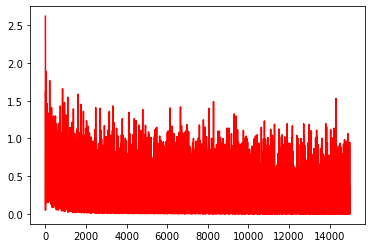

In [9]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [10]:
# evaluate training set accuracy
scores = np.dot(theta.T, X)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.97


## 4) Dựa vàofile ‘SoftmaxRegression-Delta-1D-2Class-batch.ipynb’, cài đặt lại cho file data ‘iris_full.csv’.

In [11]:
import numpy as np
import matplotlib.pyplot as plot
# load data
iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_full[:, :4]
y = iris_full[:, 4].astype(np.uint8)

# prepare data
def normalize_data(X):
    max_X = np.max(X, axis=0)
    min_X = np.min(X, axis=0)
    return (X-min_X)/(max_X-min_X)
X = normalize_data(X)
num_samples = X.shape[0]
intercept = np.ones((num_samples, 1))
X = np.concatenate([intercept, X], axis=1)
X = X.T

# initialize parameter
l_r = 1
epochs = 100
D = 4 # # of features
K = 3 # # of classes
theta = np.random.randn(D+1, K)

batch_size = num_samples
losses = []
idxs = np.arange(batch_size)
for i in range(epochs):    
    #shuffle data
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y = y[idxs]
    # compute score
    Z = np.dot(theta.T, X)
    
    # compute prob
    exp_score = np.exp(Z)
    prob = exp_score/np.sum(exp_score, axis=0 , keepdims=True)
    
    # compute loss
    correct_logprob = -np.log(prob[y, range(batch_size)])
    loss = np.mean(correct_logprob)
    losses.append(loss)
    
    # compute gradient on score
    dscore = prob
    dscore[y, range(batch_size)] -= 1
    
    # backprob to (w,b)
    dtheta = np.dot(X, dscore.T)/batch_size
    
    # update weight
    theta += - l_r*dtheta
    


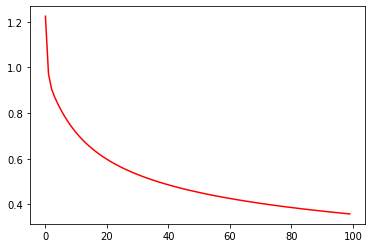

In [12]:
plt.plot(list(range(len(losses))), losses, color='r')
plt.show()

In [13]:
score = np.dot(theta.T, X)
infer = np.argmax(score, axis=0)
print("Training accuracy: {}".format(np.mean(infer==y)))


Training accuracy: 0.94
